In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-regression/Social_Network_Ads.csv


In [2]:
df=pd.read_csv('/kaggle/input/logistic-regression/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit(df['Gender']).transform(df['Gender'])

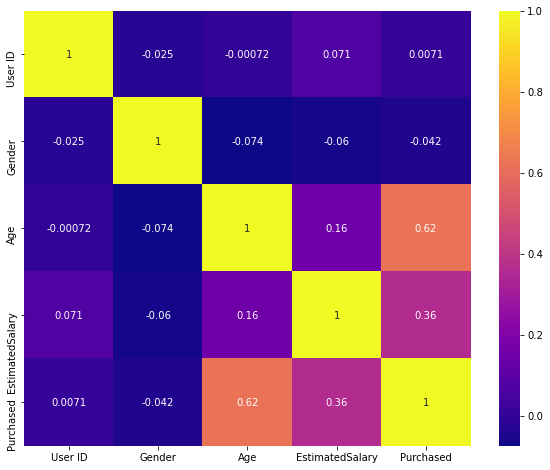

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [6]:
df[['Purchased']].value_counts()

Purchased
0            257
1            143
dtype: int64

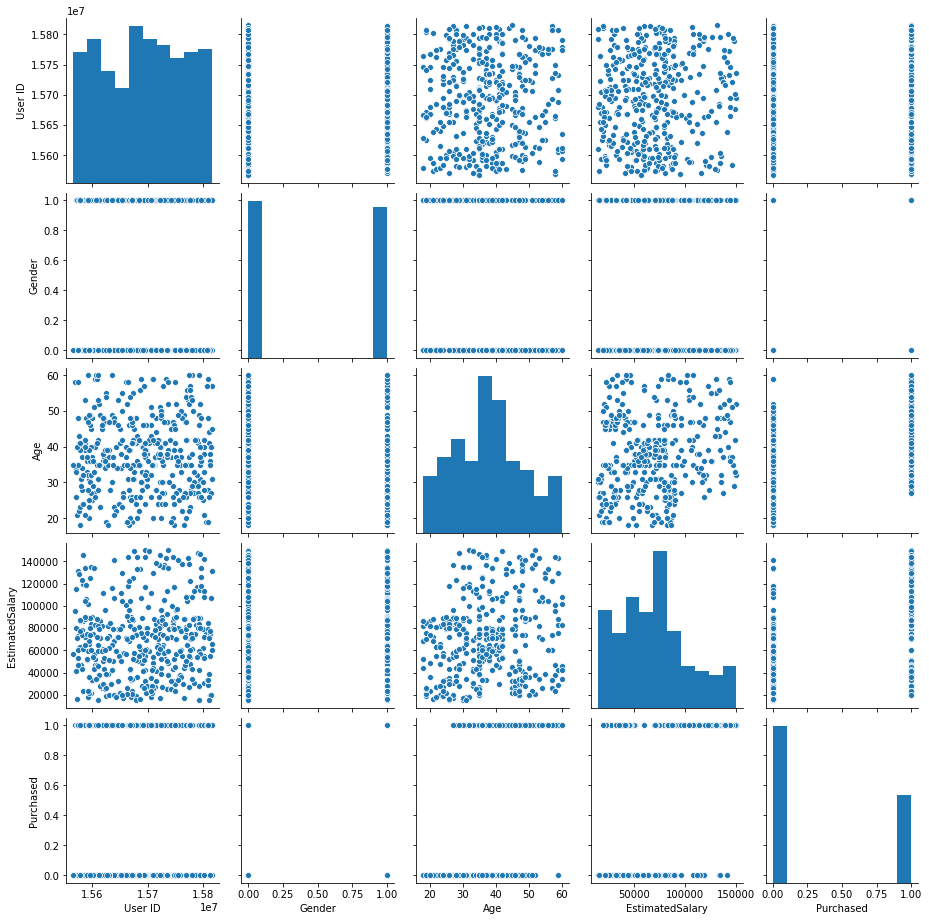

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.model_selection import train_test_split
X=df.drop(['Purchased','User ID'],axis=1)
Y=df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [10]:
yhat=lr.predict(X_test)

Text(33.0, 0.5, 'Actual')

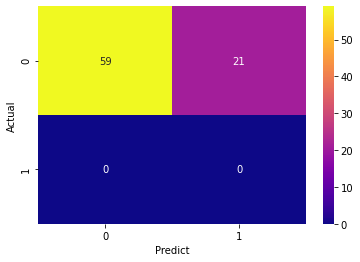

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
ax=confusion_matrix(yhat,y_test)
sns.heatmap(ax,annot=True,cmap='plasma')
plt.xlabel('Predict')
plt.ylabel('Actual')

In [12]:
print("Model Score : ",accuracy_score(yhat,y_test))

Model Score :  0.7375


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
def Kneigh(X_train,X_test,y_train,y_test):
    
    score=[]
    
    for i in range(1,10):
        KN=KNeighborsClassifier(n_neighbors=i)
        KN.fit(X_train,y_train)
        KN_pred=KN.predict(X_test)
        score.append(accuracy_score(KN_pred,y_test))
    
    max_score=max(score)
    max_score_index=score.index(max_score)+1
    print(f"maximum score is {max_score} for neighbors ={max_score_index}")

In [15]:
Kneigh(X_train,X_test,y_train,y_test)

maximum score is 0.85 for neighbors =7


# **Conclusion**
**Best Model is K Nearest Neighbors with accuracy score 0.85 when we take neighbors =7**